## Programming for Data Analysis

Course: HDip in Computing in Data Analytics
Module: Programming for Data Analysis
Author: Stefania Verduga
***

## Table of Contents

1. [Description](#Description)
- 1.1 [Technology and Libraries used for this project](#Technology-and-Libraries-used-for-this-project)
2. [Objectives of the Project](#Objectives-of-the-Project)
3. [Analysis](#Analysis)
- 3.1 [Extracting data from datasets](#Extracting-data-from-datasets)
    - 3.1.1 [CO2](#CO2)
    - 3.1.2 [Temperature](#Temperature)
    - 3.1.3 [Temperature and CO2 Evolution](#Temperature-and-CO2-Evolution)
- 3.2 [Examine one other feature: CH4](#Examine-one-other-feature:-CH4)
- 3.3 [Irish Context: Rainfall](#Irish-Context:-Rainfall)
4. [Conclusion](#Conclusion)
5. [References](#References)
***

## 1. Description

The project is an Analysis of paleo-present climate data. The following steps need to be done in order to carry out it succesfully:
- Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage).
- Examine Irish context:
    - Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)
- Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats.
- For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).
- Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue.
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice- coverage).
***

### 1.1 Technology and Libraries used for this project

This project was developed using Python [01] and the following packages:

- **Numpy**: used to perform a wide variety of mathematical operations on arrays. NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation. [02]
- **Pandas**: used to perform data manipulation and analysis.Pandas is a Python library for data analysis. It is built on top of two core Python libraries—matplotlib for data visualization and NumPy for mathematical operations. Pandas acts as a wrapper over these libraries, allowing you to access many of matplotlib's and NumPy's methods with less code. [03]
- **Matplotlib**: used for data visualization and graphical ploting. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. [04]
- **Seaborn**: built on top of matplotlib with similar functionalities. Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. [05]

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Objectives of the project

The objective of this project is to analyze the relationship between CO2 levels and temperature. According to the Global Monitoring Laboratory NOAA, "*Since the beginning of the atmospheric measurement record, annually-averaged CO2 concentrations have risen without interruption. This continuous increase is driven by the burning of fossil fuels. The two significant exceptions to this steady increase in emissions are both attributable to major global economic disruptions: emissions fell from 2008 to 2009 as a result of the global economic recession, and from 2019 to 2020 due to the COVID pandemic. These small decreases are not large enough to significantly slow the growth of atmospheric CO2 concentrations*"[06].

The CO2 is the most important greenhouse gas, which absorbs and radiates heat. The greenhouse gases absorb heat from the surface of the Earth and release it in all directions. Without CO2, the natural greenhouse effect of the Earth would be too weak to keep the global surface temperature above freezing. However, by adding more CO2 to the atmosphere as it is currently happening, we are supercharging the natural greenhouse effect, causing global temperature to rise [07].
***

## 3. Analysis

### 3.1 Extracting data from datasets

### 3.1.1 CO2

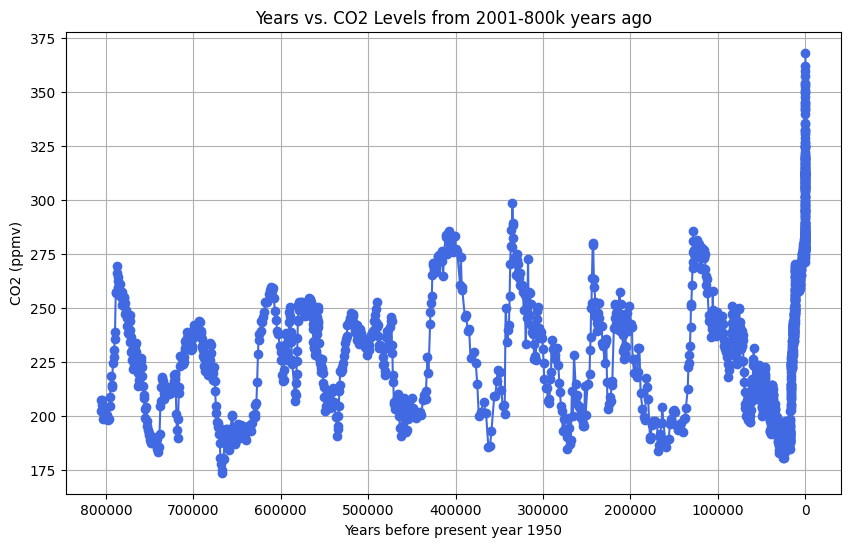

In [2]:
# Read data from Bereiter Supplementary data
co2_df = pd.read_excel('/Users/stefania/PfDA/PfDA-project-2/Datasets/grl52461-sup-0003-supplementary.xls', sheet_name='CO2 Composite', skiprows=14)

# Handling NaN values
co2_df.dropna(subset=['Gasage (yr BP) ', 'CO2 (ppmv)'], inplace=True)

# Extracting data from the first two columns, years and CO2
years = co2_df['Gasage (yr BP) ']
co2 = co2_df['CO2 (ppmv)']

# Plotting the CO2 data
plt.figure(figsize=(10, 6))
plt.plot(years, co2, marker='o', linestyle='-', color='royalblue')
plt.xlabel('Years before present year 1950')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels from 2001-800k years ago')
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

### 3.1.2 Temperature

In [3]:
# Read data from Jouzel - EpicaDC
temperature_df = pd.read_excel('/Users/stefania/PfDA/PfDA-project-2/Datasets/epicaDC.deuttemp.EDC3-AICC.xls')

# Handling NaN values
temperature_df.dropna(subset=['EDC3béta', 'temp'], inplace=True)

# Function to convert Fahrenheit to Celsius
def fahrenheit_to_celsius(f):
    return (f - 32) * 5 / 9

# Apply the function to the specified column from the DataFrame
temperature_df['Temperature_Celsius'] = temperature_df['temp'].apply(fahrenheit_to_celsius)

# Show up the final DataFrame
print(temperature_df)

       bag     ztop      EDC3béta       AICC2012  deutfinal   temp   
0        1     0.00     -50.00000     -55.000000        NaN  218.3  \
1        2     0.55     -43.55977     -50.513333        NaN  218.3   
2        3     1.10     -37.44019     -46.026667        NaN  218.3   
3        4     1.65     -31.64156     -41.540000        NaN  218.3   
4        5     2.20     -24.55278     -34.516667        NaN  218.3   
...    ...      ...           ...            ...        ...    ...   
5814  5815  3197.70  816871.60000  817562.000000     -432.2  211.0   
5815  5816  3198.25  817693.60000  818631.000000     -431.4  211.2   
5816  5817  3198.80  818505.50000  819700.000000     -430.3  211.3   
5817  5818  3199.35  819303.10000  820769.000000     -429.8  211.4   
5818  5819  3199.90  820093.90000  821838.000000     -430.0  211.4   

      acc-EDC3beta  Temperature_Celsius  
0         3.105321           103.500000  
1         3.104805           103.500000  
2         3.104404           103.

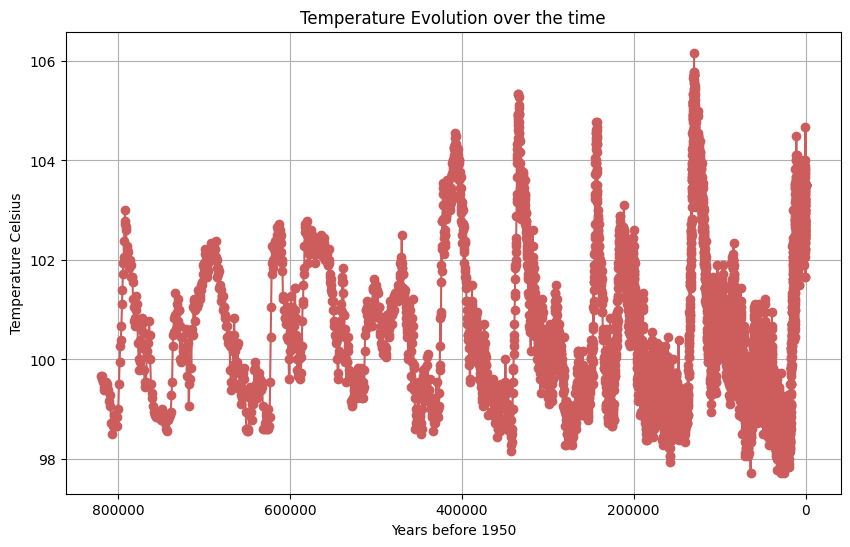

In [4]:
# Extracting data from the columns of our interest, years and temperature in Celsius degrees
temp_years = temperature_df['EDC3béta']
temperature_celsius = temperature_df['Temperature_Celsius']

# Plotting the temperature data
plt.figure(figsize=(10, 6))
plt.plot(temp_years, temperature_celsius, marker='o', linestyle='-', color='indianred')
plt.xlabel('Years before 1950')
plt.ylabel('Temperature Celsius')
plt.title('Temperature Evolution over the time')
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

### 3.1.3 Temperature and CO2 Evolution

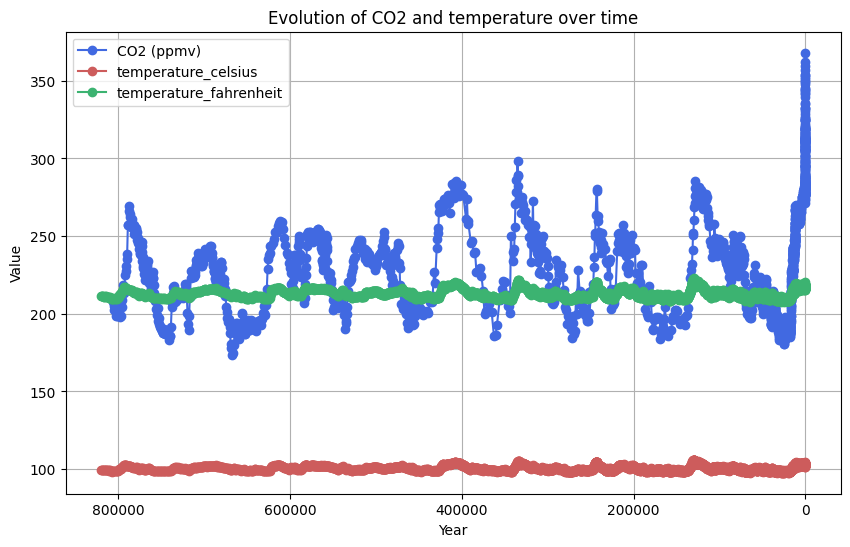

In [5]:
# Plotting both variables on the same graph
plt.figure(figsize=(10, 6))

# Plotting CO2
plt.plot(years, co2, marker='o', linestyle='-', color='royalblue', label='CO2 (ppmv)')

# Plotting temperature in Celsius degrees
plt.plot(temp_years, temperature_celsius, marker='o', linestyle='-', color='indianred', label='temperature_celsius')

# Plotting temperature in Fahrenheit degrees
temperature_fahrenheit = temperature_df['temp']
plt.plot(temp_years, temperature_fahrenheit, marker='o', linestyle='-', color='mediumseagreen', label='temperature_fahrenheit')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Evolution of CO2 and temperature over time')
plt.grid(True)
plt.legend()
plt.gca().invert_xaxis() 
plt.show()

### 3.2 Examine one other feature: CH4
https://www.nature.com/articles/nature06950

In [6]:
# Read data from Supplementary data
ch4_df = pd.read_excel('/Users/stefania/PfDA/PfDA-project-2/Datasets/41586_2008_BFnature06950_MOESM33_ESM.xls', skiprows=17)

print(ch4_df)

      EDC1999 depth [m]  gas age (edc3_gas_a)  CH4 mean [ppbv]   
0             99.340000                  13.4       907.000000  \
1            102.449054                 125.7       784.470000   
2            102.575000                 129.6       761.700000   
3            103.338586                 151.2       710.489633   
4            104.330000                 184.3       726.800000   
...                 ...                   ...              ...   
2098        3188.082500              794938.0       428.300000   
2099        3188.945000              796319.7       418.000000   
2100        3189.427500              797277.0       396.100000   
2101        3190.030000              798417.4       457.800000   
2102        3190.525000              799396.1       399.300000   

      1 s uncertainty  [ppbv] Bern, Grenoble  
0                        10.0              b  
1                        10.0              g  
2                        10.0              b  
3                  

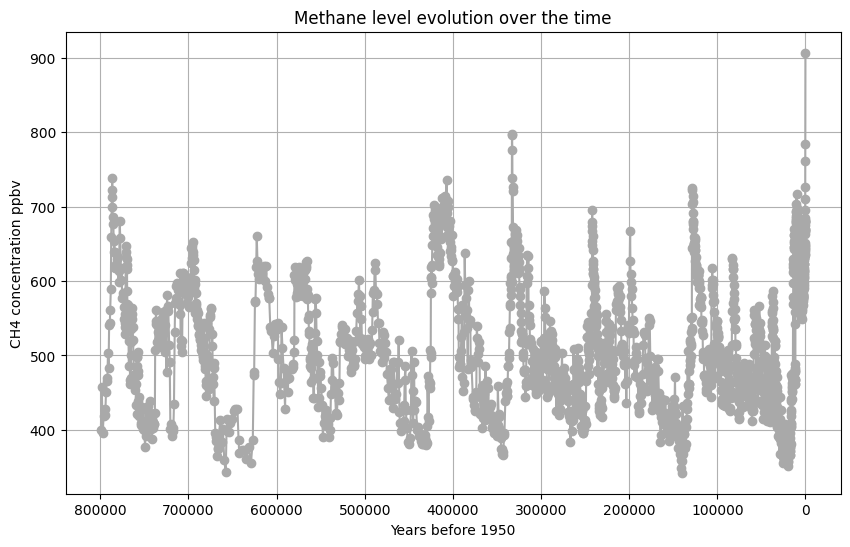

In [7]:
# Extracting data from the columns years and CH4
ch4_years = ch4_df['gas age (edc3_gas_a)']
ch4 = ch4_df['CH4 mean [ppbv]']

# Plotting the temperature data
plt.figure(figsize=(10, 6))
plt.plot(ch4_years, ch4, marker='o', linestyle='-', color='darkgray')
plt.xlabel('Years before 1950')
plt.ylabel('CH4 concentration ppbv')
plt.title('Methane level evolution over the time')
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

### 3.3 Irish Context: Rainfall
https://www.sciencedirect.com/science/article/pii/S2212094723000610#bib13
https://www.met.ie/climate/available-data

In [8]:
# Reading data from original dataset
rainfall_df = pd.read_csv('/Users/stefania/PfDA/PfDA-project-2/Datasets/IOI_1711_SERIES.CSV')
rainfall_df.head()

,Year,Month,Median montly series
0,1711,1,16.4
1,1711,2,73.1
2,1711,3,121.2
3,1711,4,85.2
4,1711,5,66.6


In [9]:
# Agregate the monthly data into yearly data
# Convert Month and Year to datetime format
rainfall_df['Date'] = pd.to_datetime(rainfall_df[['Year', 'Month']].assign(DAY=1))

# Group by Year and calculate the median for each year
yearly_rain_df = rainfall_df.groupby(rainfall_df['Date'].dt.year)['Median montly series'].median().reset_index()

# Rename the columns
yearly_rain_df.columns = ['Year', 'Median_yearly_rainfall']

print(yearly_rain_df)

     Year  Median_yearly_rainfall
0    1711                   79.70
1    1712                  102.70
2    1713                   78.60
3    1714                   72.95
4    1715                  107.55
..    ...                     ...
301  2012                  103.70
302  2013                   77.15
303  2014                   92.10
304  2015                  100.15
305  2016                   79.80

[306 rows x 2 columns]


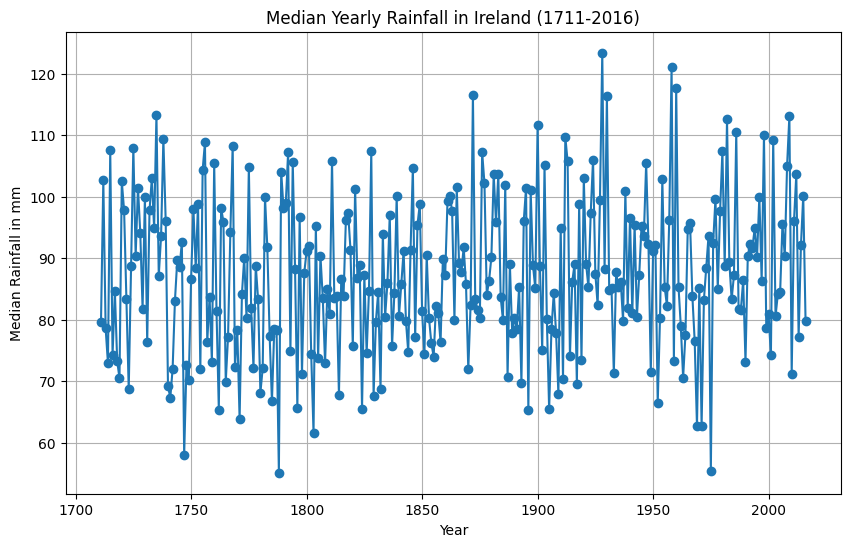

In [10]:
# Plot the median rainfall per year
plt.figure(figsize=(10, 6))
plt.plot(yearly_rain_df['Year'], yearly_rain_df['Median_yearly_rainfall'], marker="o", linestyle="-")
plt.title('Median Yearly Rainfall in Ireland (1711-2016)')
plt.xlabel('Year')
plt.ylabel('Median Rainfall in mm')
plt.grid(True)
plt.show()

## 5. References
[01] [Python Software Foundation. (2023). Python](#https://www.python.org/)  
[02] [NumPy team. (2023). Numpy](#https://numpy.org/)  
[03] [Pandas via NumFOCUS. (2023). Pandas](#https://pandas.pydata.org/)  
[04] [Matplotlib development team. (2012 - 2023). Matplotlib: Visualization with Python](#https://matplotlib.org/)  
[05] [Seaborn Development Team. (2012 - 2023). Seaborn: Statistical Data Visualization](#https://seaborn.pydata.org/)  
[06] [Global Monitoring Laboratory - NOAA Research. (2022). CarbonTracker CT2022](#https://gml.noaa.gov/ccgg/carbontracker/)  
[07] [Climate.gov. (2023). Climate Change: Atmospheric Carbon Dioxide](#https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide)  